In [1]:
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree, export_text
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate as cv

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import get_data

%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

from utils import get_data

%matplotlib inline
pd.set_option('display.max_columns', 50)
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [2]:
def plot_cm(_model, _X_test, _y_test):
    predictions = _model.predict(_X_test)
    cm = confusion_matrix(_y_test, predictions, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [3]:
XY_train, X_test, inverse_target_map = get_data(min_size=150, min_size_test=150, nan_thresh=10, fill_nan=-2)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

/home/ad.adasworks.com/levente.peto/projects/IPCV/DMandML/assignment/utils.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XY_train[c][XY_train.groupby(c)[c].transform('size') <= min_size] = -1
/home/ad.adasworks.com/levente.peto/projects/IPCV/DMandML/assignment/utils.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[c][X_test.groupby(c)[c].transform('size') <= min_size_test] = -1


0.29855350380196966


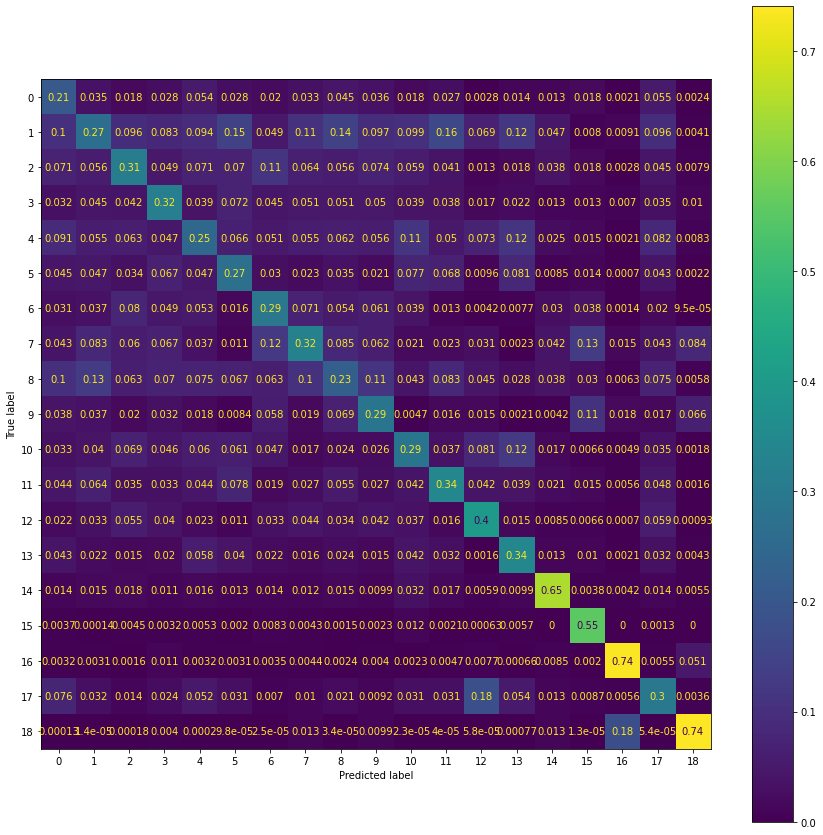

In [4]:
dtc = DTC(max_depth=15,
          random_state=42,
          #class_weight="balanced"
         )
dtc = dtc.fit(XY_train[train_columns], XY_train["TARGET_NUM"])
print(dtc.score(XY_train[train_columns], XY_train["TARGET_NUM"]))
plot_cm(dtc, XY_train[train_columns], XY_train["TARGET_NUM"])

In [7]:
XY_train, X_test, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-2)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

x_train_full_df = pd.DataFrame(x_train_full, columns=train_columns, index=XY_train.index)

min_size = 150

for c in x_train_full_df.columns:
    if c != "TARGET_NUM":
        x_train_full_df[c][x_train_full_df.groupby(c)[c].transform('size') <= min_size] = -1
        
stand_scaler = StandardScaler()
X_train_stand = stand_scaler.fit(x_train_full_df[train_columns])
x_train_stand = X_train_stand.transform(x_train_full_df[train_columns])

0.29852293221060744


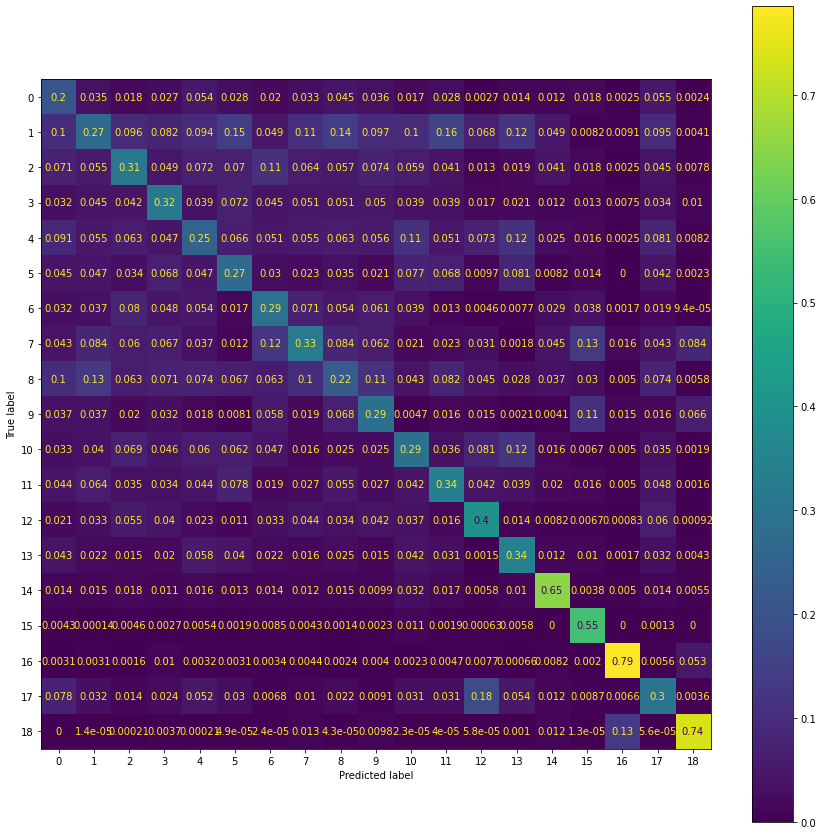

In [8]:
dtc = DTC(max_depth=15,
          random_state=42,
          #class_weight="balanced"
         )
dtc = dtc.fit(x_train_stand, XY_train["TARGET_NUM"])
print(dtc.score(x_train_stand, XY_train["TARGET_NUM"]))
plot_cm(dtc, x_train_stand, XY_train["TARGET_NUM"])

In [9]:
XY_train, X_test, inverse_target_map = get_data(min_size=None, min_size_test=None, nan_thresh=10, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

rs = RobustScaler()
rs_train = rs.fit(x_train)
x_train_full = rs_train.transform(x_train_full)

0.2990764673958036


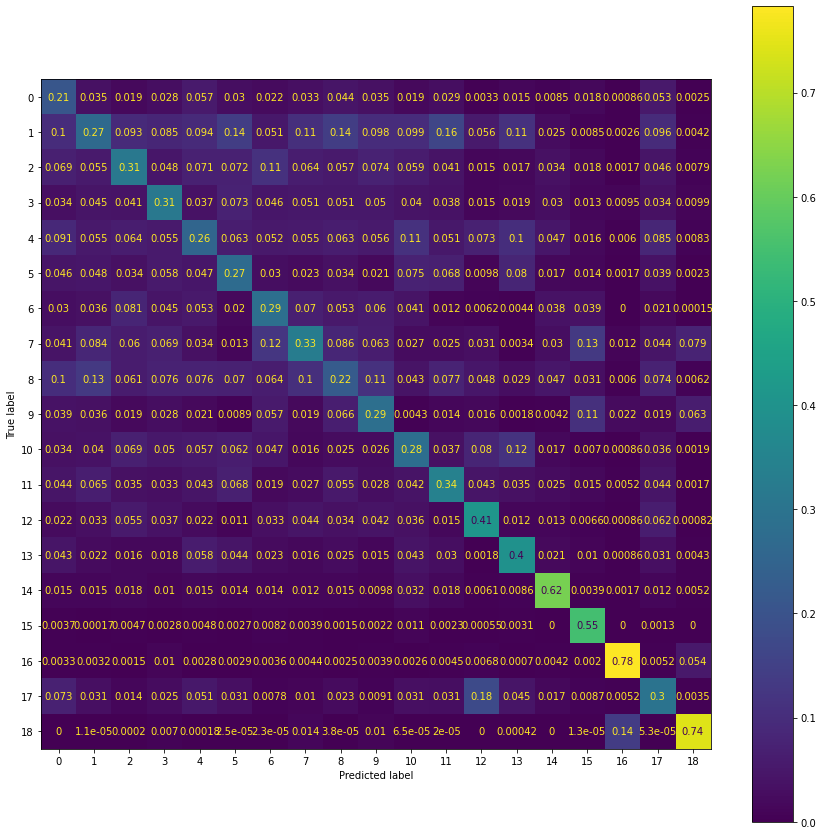

In [10]:
dtc = DTC(max_depth=15,
          random_state=42,
          #class_weight="balanced"
         )
dtc = dtc.fit(x_train_full, XY_train["TARGET_NUM"])
print(dtc.score(x_train_full, XY_train["TARGET_NUM"]))
plot_cm(dtc, x_train_full, XY_train["TARGET_NUM"])

## Predict

In [7]:
X_test.head()

,Condition_importance,Hospital_death_flag,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total",...,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2,Admission_type_NUM,Marital_status_NUM,Ethnicity_NUM,Gender_NUM
0,10.0,0.0,67.0,-2.0,-2.0,14.0,-2.0,-2.0,29.0,-2.0,...,139.0,49.0,11.9,-2.0,5.0,-2.0,0.0,2.0,1.0,1.0
1,4.0,0.0,74.0,43.0,102.0,12.0,34.0,0.0,29.0,1.0,...,138.0,18.0,7.6,56.0,6.5,447.0,3.0,1.0,0.0,0.0
2,2.0,0.0,59.0,28.0,117.0,17.0,51.0,-2.0,22.0,0.1,...,149.0,52.0,2.5,-2.0,7.0,-2.0,4.0,1.0,3.0,1.0
3,1.0,0.0,78.0,-2.0,-2.0,14.0,-2.0,-2.0,19.0,-2.0,...,138.0,35.0,6.3,-2.0,-2.0,-2.0,2.0,0.0,0.0,0.0
4,5.0,0.0,80.0,-2.0,-2.0,13.0,-2.0,-2.0,24.0,-2.0,...,142.0,33.0,4.9,-2.0,5.5,-2.0,0.0,0.0,0.0,1.0


In [14]:
result = dtc.predict(X_test[train_columns])
result_df = pd.DataFrame(result, columns=["TARGET"], index=X_test.index)
result_df.index += 1
result_df['TARGET'] = result_df['TARGET'].map(inverse_target_map)

In [15]:
result_df.to_csv("./result.csv", index_label="ID")

## Cross Validation

In [8]:
cv_results = cv(DTC(max_depth=6, random_state=42), XY_train[train_columns], XY_train["TARGET_NUM"], cv=6)

In [9]:
cv_results

{'fit_time': array([102.94984198,  44.25799298,  44.59815407,  47.31867695,
         43.69982767,  43.0332315 ]),
 'score_time': array([0.17797303, 0.17945242, 0.18615746, 0.19802189, 0.17221308,
        0.23714352]),
 'test_score': array([0.25317471, 0.25460968, 0.25409185, 0.25516808, 0.25409672,
        0.25360204])}

In [10]:
for md in range(1, 10, 2):
    cv_results = cv(DTC(max_depth=md, random_state=42), XY_train[train_columns], XY_train["TARGET_NUM"], cv=6)
    print(md)
    print(cv_results)
    print()

1
{'fit_time': array([51.81391788, 20.28939295,  8.76443052,  8.86381316,  8.29619646,
        7.85741687]), 'score_time': array([0.37213993, 0.18297219, 0.17750645, 0.20355487, 0.13253307,
       0.17991614]), 'test_score': array([0.16636717, 0.16647431, 0.16674053, 0.16683467, 0.1667876 ,
       0.166671  ])}

3
{'fit_time': array([21.38240957, 21.65268993, 21.51700449, 21.51062298, 21.3478117 ,
       21.22411895]), 'score_time': array([0.15204978, 0.16426969, 0.15290952, 0.15315938, 0.15229583,
       0.15475154]), 'test_score': array([0.2261619 , 0.22651577, 0.22699788, 0.22696704, 0.2268388 ,
       0.22685378])}

5
{'fit_time': array([34.62183881, 34.82372761, 33.02477479, 32.93944907, 32.97292018,
       33.15915513]), 'score_time': array([0.16167569, 0.16185594, 0.16302633, 0.16280675, 0.16170144,
       0.16258621]), 'test_score': array([0.24518823, 0.24590571, 0.24579858, 0.24615569, 0.24509895,
       0.2451383 ])}

7
{'fit_time': array([45.52511835, 45.18769908, 44.7146091

In [11]:
for md in range(9, 20, 2):
    cv_results = cv(DTC(max_depth=md, random_state=42), XY_train[train_columns], XY_train["TARGET_NUM"], cv=6)
    print(md)
    print('fit_time: ', cv_results['fit_time'])
    print('test_score: ', cv_results['test_score'])
    print()

9
fit_time:  [ 56.28441215  56.08261609  82.09844971 108.54105544  57.64615631
  56.31803918]
test_score:  [0.26854868 0.26893827 0.26957784 0.26863959 0.26782958 0.26860756]

11
fit_time:  [67.02124763 75.32560444 71.79322672 68.55866456 69.28855824 66.9003408 ]
test_score:  [0.27479827 0.27506935 0.27593131 0.27510507 0.27462945 0.27519479]

13
fit_time:  [77.18729687 76.52531099 78.44546938 76.55202389 76.55938768 76.67362905]
test_score:  [0.27939536 0.27928174 0.28021999 0.27941809 0.2792931  0.27948348]

15
fit_time:  [ 86.00927949  88.10084629  86.02041793  85.77809715  87.94731784
 108.08406472]
test_score:  [0.2798791  0.28007551 0.28066151 0.28019077 0.27935641 0.28050938]

17
fit_time:  [118.17928696 156.45397758 145.93923473 147.93474793 106.34603047
  96.84692883]
test_score:  [0.27636797 0.27682248 0.27712604 0.27688904 0.27649621 0.27731478]

19
fit_time:  [108.30904984 152.41559839 152.53218484 127.70477104 105.01911354
 103.93792224]
test_score:  [0.26988788 0.27023526

## Data Scaling and PCA

In [3]:
XY_train, X_test, inverse_target_map = get_data(min_size=None, min_size_test=None, fill_nan=None)
train_columns = list(XY_train.columns)
train_columns.remove("TARGET_NUM")

#XY_train.dropna(thresh=26)

min_max_scaler = MinMaxScaler(feature_range=(2, 10))
X_train_minmax = min_max_scaler.fit(XY_train[train_columns])
x_train = X_train_minmax.transform(XY_train[train_columns])

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)
imp_train = imp.fit(x_train)
x_train_full = imp_train.transform(x_train)

x_train_full_df = pd.DataFrame(x_train_full, columns=train_columns, index=XY_train.index)

min_size = 150

for c in x_train_full_df.columns:
    if c != "TARGET_NUM":
        x_train_full_df[c][x_train_full_df.groupby(c)[c].transform('size') <= min_size] = 0

In [ ]:
pca = PCA(n_components=30)
pca_result = pca.fit_transform(x_train_stand)

In [6]:
for md in range(1, 20, 2):
    cv_results = cv(DTC(max_depth=md, random_state=42), x_train_full_df, XY_train["TARGET_NUM"], cv=4)
    print(md)
    print('fit_time: ', cv_results['fit_time'])
    print('test_score: ', cv_results['test_score'])
    print()

1
fit_time:  [99.28541756 44.76312447 54.32383966 33.9185257 ]
test_score:  [0.16639901 0.16665458 0.16686669 0.16666324]

3
fit_time:  [67.91403008 73.90566516 61.36198282 58.76815367]
test_score:  [0.22587013 0.22663006 0.226682   0.22646882]

5
fit_time:  [ 97.57381058  99.95340466 106.16890836  46.04207158]
test_score:  [0.24529739 0.24575759 0.24570889 0.2451375 ]

7
fit_time:  [62.53537893 57.97712302 57.19697976 57.47675037]
test_score:  [0.26087643 0.26124899 0.26091784 0.2608107 ]

9
fit_time:  [71.35453153 70.54756522 67.17857099 66.49776864]
test_score:  [0.26828611 0.2694584  0.26835891 0.26806347]

11
fit_time:  [78.80918932 83.69561601 80.84177899 78.29950142]
test_score:  [0.27484411 0.27527512 0.2749905  0.2744624 ]

13
fit_time:  [88.61646605 86.53035426 85.81987381 88.17490911]
test_score:  [0.27884925 0.27959193 0.27927052 0.27855412]

15
fit_time:  [99.01832128 93.81445479 76.992661   77.27195549]
test_score:  [0.27965656 0.27966768 0.27962764 0.27941554]

17
fit_ti

In [4]:
pca = PCA(n_components=30)
pca_result = pca.fit_transform(x_train_full_df)

In [5]:
for md in range(1, 20, 2):
    cv_results = cv(DTC(max_depth=md, min_samples_split=100, random_state=42), pca_result, XY_train["TARGET_NUM"],
                    cv=4)
    print(md)
    print('fit_time: ', cv_results['fit_time'])
    print('test_score: ', cv_results['test_score'])
    print()

1
fit_time:  [28.39058018 28.64505553 28.97019291 29.68345165]
test_score:  [0.16479089 0.16502698 0.16513845 0.16499777]

3
fit_time:  [ 84.24616098  83.57447815  84.68862343 105.20012903]
test_score:  [0.2030275  0.20314568 0.20247256 0.20269008]

5
fit_time:  [145.20880699 145.35263062 140.84023571 134.044168  ]
test_score:  [0.22155332 0.22192041 0.22141287 0.22143668]

7
fit_time:  [196.35441303 192.28988218 174.42633486 169.55307269]
test_score:  [0.23939195 0.23965301 0.23987594 0.23852646]

9
fit_time:  [210.76572633 210.4213407  210.80757785 210.31187153]
test_score:  [0.24966615 0.24969672 0.24910152 0.2485377 ]

11
fit_time:  [248.19999051 248.27538347 247.94012284 247.60587883]
test_score:  [0.25687995 0.2568153  0.25620819 0.2565783 ]

13
fit_time:  [279.28743124 266.48568368 251.40030956 248.97805619]
test_score:  [0.26077038 0.26143404 0.26090485 0.26013651]

15
fit_time:  [272.51161838 273.83381152 272.3078413  271.73858762]
test_score:  [0.26190667 0.26251297 0.2623333